In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
df=pd.read_csv('clean_resume_data.csv')
df.head()

,ID,Category,Feature
0,16852973,HR,hr administrator marketing associate hr admini...
1,22323967,HR,hr specialist hr operations summary media prof...
2,33176873,HR,hr director summary years experience recruitin...
3,27018550,HR,hr specialist summary dedicated driven dynamic...
4,17812897,HR,hr manager skill highlights hr skills hr depar...


In [3]:
df.shape


(2484, 3)

Exploratory Data Analysis

In [6]:
df['Category'].value_counts()

Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
ADVOCATE                  118
CHEF                      118
ENGINEERING               118
ACCOUNTANT                118
FINANCE                   118
FITNESS                   117
AVIATION                  117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64

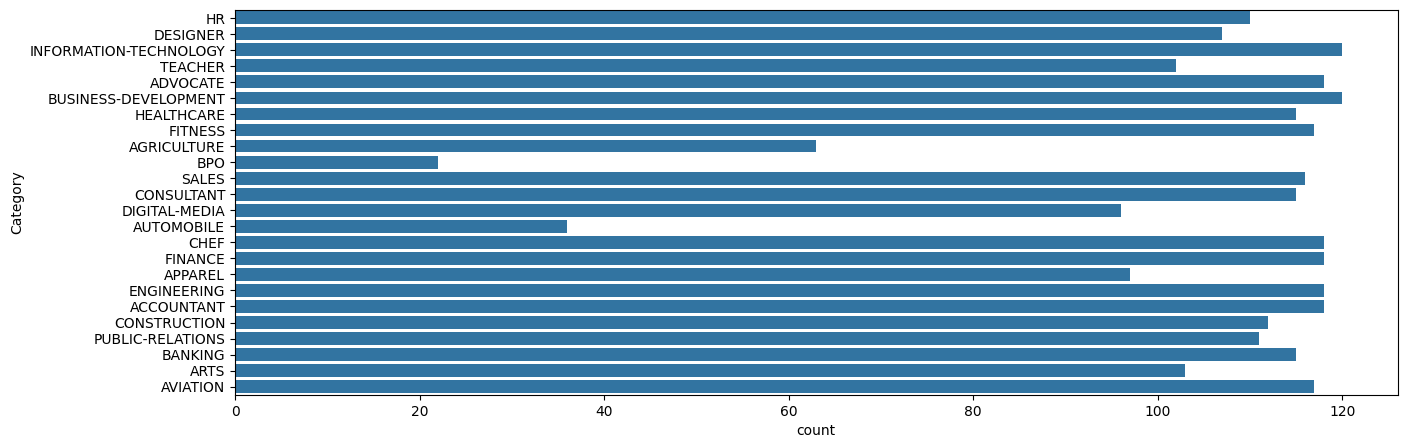

In [9]:
plt.figure(figsize=(15,5))
sns.countplot(df['Category'])
plt.show()

In [16]:
print(df['Category'].unique())

['HR' 'DESIGNER' 'INFORMATION-TECHNOLOGY' 'TEACHER' 'ADVOCATE'
 'BUSINESS-DEVELOPMENT' 'HEALTHCARE' 'FITNESS' 'AGRICULTURE' 'BPO' 'SALES'
 'CONSULTANT' 'DIGITAL-MEDIA' 'AUTOMOBILE' 'CHEF' 'FINANCE' 'APPAREL'
 'ENGINEERING' 'ACCOUNTANT' 'CONSTRUCTION' 'PUBLIC-RELATIONS' 'BANKING'
 'ARTS' 'AVIATION']


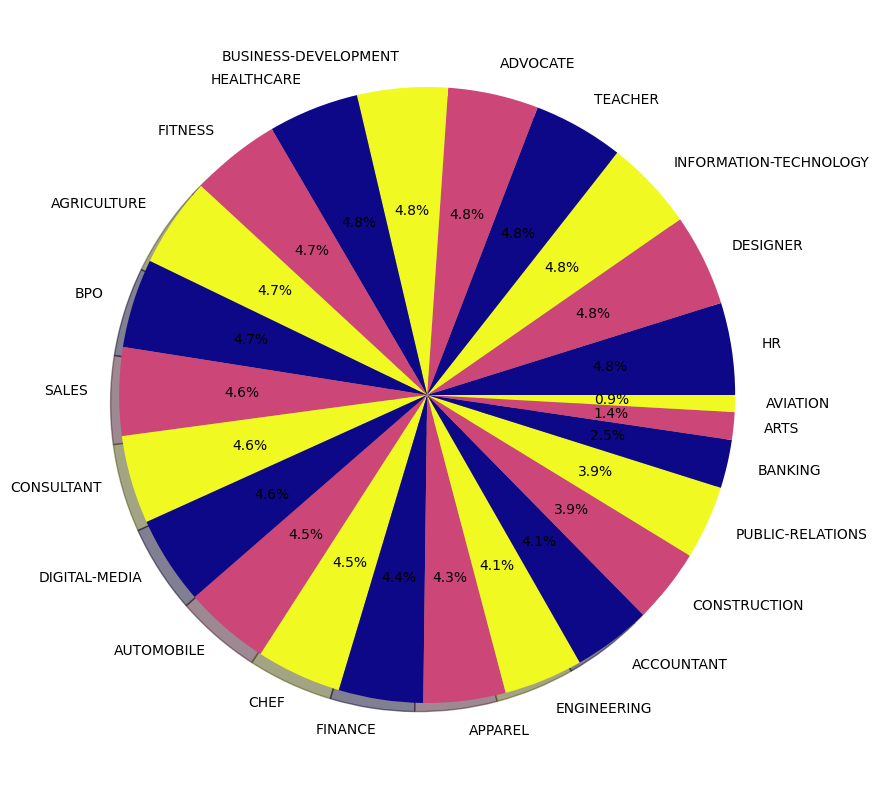

In [22]:
counts=df['Category'].value_counts()
labels=df['Category'].unique()
plt.figure(figsize=(15,10))

plt.pie(counts,labels=labels,autopct='%1.1f%%',shadow=True,colors=plt.cm.plasma(np.linspace(0,1,3)))
plt.show()

Balance Dataset


In [23]:
df['Category'].value_counts()

Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
ADVOCATE                  118
CHEF                      118
ENGINEERING               118
ACCOUNTANT                118
FINANCE                   118
FITNESS                   117
AVIATION                  117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64

In [28]:
from sklearn.utils import resample

max_count=df['Category'].value_counts().max()

balanced_data=[]
for category in df['Category'].unique():
    category_data=df[df['Category']==category]
    if len(category_data)<max_count:
        balanced_category_data=resample(category_data,replace=True,n_samples=max_count,random_state=42)
    else:
        balanced_category_data=resample(category_data,replace=False,n_samples=max_count,random_state=42)
    balanced_data.append(balanced_category_data)

balanced_df=pd.concat(balanced_data)

In [33]:
balanced_df['Category'].value_counts()

Category
HR                        120
DESIGNER                  120
INFORMATION-TECHNOLOGY    120
TEACHER                   120
ADVOCATE                  120
BUSINESS-DEVELOPMENT      120
HEALTHCARE                120
FITNESS                   120
AGRICULTURE               120
BPO                       120
SALES                     120
CONSULTANT                120
DIGITAL-MEDIA             120
AUTOMOBILE                120
CHEF                      120
FINANCE                   120
APPAREL                   120
ENGINEERING               120
ACCOUNTANT                120
CONSTRUCTION              120
PUBLIC-RELATIONS          120
BANKING                   120
ARTS                      120
AVIATION                  120
Name: count, dtype: int64

In [ ]:
balanced_df.isnull().sum()

ID          0
Category    0
Feature     1
dtype: int64

In [35]:
balanced_df.dropna(inplace=True)

In [36]:
balanced_df.isnull().sum()

ID          0
Category    0
Feature     0
dtype: int64

Train-Test Split

In [39]:
X=balanced_df['Feature']
y=balanced_df['Category']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

Encoding(TF-IDF)

In [40]:
X_train

228     director information technology professional p...
1557    senior finance manager summary highly driven f...
1194    consultant summary media planner media buyer r...
916     adult education teacher accomplishments cal po...
2150    banking summary high energy manager successful...
                              ...                        
1328    director executive profile forward thinker exp...
973     bpo team leader summary seeking provide top qu...
979     manager administration facilities executive su...
1027    pmc psm sales manager sales associate career f...
793     fitness specialist summary energetic personal ...
Name: Feature, Length: 2303, dtype: object

In [42]:
tfidf_vectorizer=TfidfVectorizer()
X_train_tfidf=tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf=tfidf_vectorizer.transform(X_test)

In [45]:
X_test_tfidf

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 179711 stored elements and shape (576, 29780)>

Train Random Forest Classifier

In [46]:
rf_classifier=RandomForestClassifier()
rf_classifier.fit(X_train_tfidf,y_train)

y_pred=rf_classifier.predict(X_test_tfidf)
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy",accuracy)

Accuracy 0.8385416666666666


In [50]:
print(classification_report(y_test,y_pred))

                        precision    recall  f1-score   support

            ACCOUNTANT       0.83      0.95      0.89        21
              ADVOCATE       1.00      0.79      0.88        29
           AGRICULTURE       0.94      0.70      0.80        23
               APPAREL       0.85      0.81      0.83        21
                  ARTS       1.00      0.68      0.81        22
            AUTOMOBILE       1.00      1.00      1.00        19
              AVIATION       0.94      0.97      0.95        30
               BANKING       0.94      0.70      0.80        23
                   BPO       1.00      1.00      1.00        15
  BUSINESS-DEVELOPMENT       0.44      0.61      0.51        18
                  CHEF       0.87      0.96      0.92        28
          CONSTRUCTION       0.89      1.00      0.94        25
            CONSULTANT       0.95      0.68      0.79        31
              DESIGNER       0.87      0.93      0.90        28
         DIGITAL-MEDIA       0.85      

In [58]:
conf_matrix=confusion_matrix(y_test,y_pred)
print(conf_matrix)

[[20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0 23  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  3  0  0  0  1]
 [ 0  0 16  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  1  0  1  0  0  3]
 [ 0  0  0 17  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  1  0  0  2  0]
 [ 0  0  0  0 15  0  1  0  0  0  1  0  0  0  1  0  0  0  0  0  1  0  0  3]
 [ 0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 29  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0 16  0  2  0  0  0  0  0  0  4  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0 11  0  0  0  0  2  1  0  0  0  1  2  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1 27  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  1  0  1 21  0  0  1  0  1  1  1  1  2  0  0]
 [ 0  0  0  0  0  0  1  0

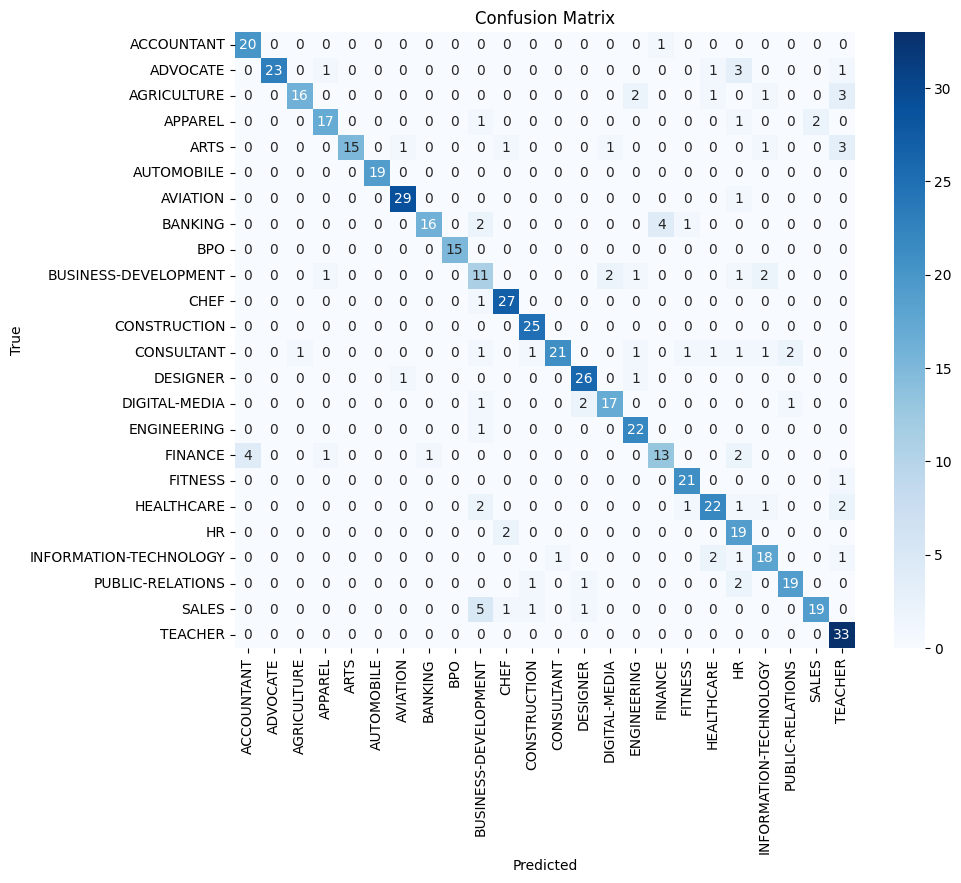

In [63]:
plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues',xticklabels=rf_classifier.classes_,yticklabels=rf_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Predictive System

In [87]:
import re
def cleanResume(txt):
    cleanText=re.sub('http\S+\s',' ',txt)
    cleanText=re.sub('RT|cc',' ',cleanText)
    cleanText=re.sub('#\S+\s',' ',cleanText)
    cleanText=re.sub('@\S+',' ',cleanText)
    cleanText=re.sub('[%s]'% re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{\}~"""),' ',cleanText)
    cleanText=re.sub(r'[^\x00-\x7f]',' ',cleanText)
    cleanText=re.sub('\s+',' ',cleanText)
    return cleanText.strip()


In [86]:
def predict_category(resume_text):
    resume_text=cleanResume(resume_text)
    resume_tfidf=tfidf_vectorizer.transform([resume_text])
    predicted_category=rf_classifier.predict(resume_tfidf)[0]
    return predicted_category

In [88]:
resume_file="hr assistant hard work dedicated detailed oriented experienced"
predicted_category=predict_category(resume_file)
print("Predicted Category:",predicted_category)

Predicted Category: HR


In [98]:
resume_file = """
Experienced IT Professional with 5+ years in managing hardware, software, and network systems in enterprise environments. 
Proven ability to provide technical support, maintain systems uptime, and implement security policies. Adept in system administration, 
troubleshooting, and customer service.

Work Experience:
- IT Support Specialist at TechZone Ltd. (2019–Present)
  - Provided Tier 1 and Tier 2 support for over 300 users across multiple departments
  - Managed Active Directory, user accounts, and group policies
  - Installed, configured, and maintained Windows servers, desktops, and printers
  - Troubleshot network connectivity and VPN issues
  - Maintained asset inventory and procurement of hardware/software

- System Administrator Intern at InfoGrid Solutions (2018–2019)
  - Assisted in server patching, OS upgrades, and firewall configuration
  - Monitored network activity using Wireshark and SolarWinds

Education:
- B.Sc. in Information Technology, ABC Institute of Tech (2015–2018)

Certifications:
- CompTIA A+
- Microsoft Certified: Azure Fundamentals
- Cisco CCNA (in progress)

Skills:
- Operating Systems: Windows, Linux (Ubuntu/CentOS)
- Networking: DNS, DHCP, VPN, TCP/IP
- Tools: Active Directory, SCCM, Jira, VMware
- Soft Skills: Communication, problem-solving, time management
"""


predicted_category=predict_category(resume_file)
print("Predicted Category:",predicted_category)

Predicted Category: INFORMATION-TECHNOLOGY


In [99]:
resume_file = """
Creative professional with over 4 years of experience crafting engaging visuals for digital and print platforms. 
Specialized in layout design, branding, and user interface design. Adept at translating ideas into compelling graphics 
using industry-standard tools.

Work Experience:
- Visual Design Specialist at PixelWorks Agency (2020–Present)
  - Developed marketing assets including brochures, posters, web banners, and social media content
  - Designed logos and brand kits for startups and established brands
  - Collaborated with marketing teams to ensure brand consistency across channels
  - Built interactive UI mockups for web and mobile apps using Figma and Adobe XD

- Design Associate at CreativeEdge Studio (2018–2020)
  - Assisted senior team in image editing, layout structuring, and visual hierarchy optimization
  - Worked on packaging design and final artwork for print

Education:
- Bachelor of Design, School of Visual Arts, Delhi (2015–2018)

Skills:
- Tools: Adobe Photoshop, Illustrator, InDesign, Figma, Adobe XD
- Focus Areas: Branding, Typography, UI/UX, Print Design
- Strengths: Creativity, time management, team collaboration
- Familiar with Windows and MacOS environments
"""
predicted_category=predict_category(resume_file)
print("Predicted Category:",predicted_category)

Predicted Category: DESIGNER


In [ ]:
import pickle
pickle.dump(rf_classifier,open('models/rf_classifier_categorization.pkl','wb'))
pickle.dump(tfidf_vectorizer,open('models/tfidf_vectorizer_categorization.pkl','wb'))